# SVM

### Gather Training data
2. OLD competition images
3. NEW pool images/video (Jons Pool)
4. Black and white images
4. ALL images combined

### Duplicate it all
1. Rotate
2. Something else

*imports*

In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix
import os
from matplotlib import pyplot as plt

%matplotlib inline

### Training Data

*useful methods*

In [2]:
# returns a list of file names in a directory: cwd is default
def get_dir_list(imgs_path):
    dir_list = []
    with os.scandir(imgs_path) as it: # from python3 docs
        for entry in it:
            if not entry.name.startswith(".") and entry.is_file:
                dir_list.append(imgs_path + entry.name)
    return dir_list

# import images and append to a list
def get_img_data(imgs_path):
    img_list = []
    for img in imgs_path:
        img_list.append(cv2.imread(img) )
    return img_list

# read in each image (feature) and assign label
def get_features_with_label(image_data, hog, dimensions, label):
    data = []
    for img in image_data:
        image = cv2.resize(img, dimensions) # resize to proportion might help
        feats = hog.compute(image[:, :, :])
        data.append((feats, label) )
    return data

*import directory*

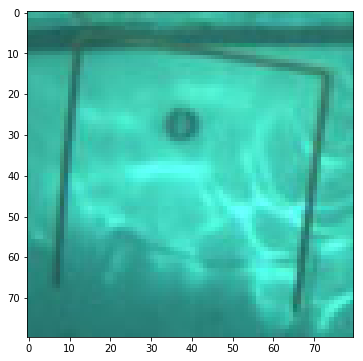

Shape:  (80, 80, 3)


In [25]:
pos_image_path = "../images/all_positive/"
neg_image_path = "../images/all_negative/"

pos_img_list = get_dir_list(pos_image_path)
neg_img_list = get_dir_list(neg_image_path)

positive_images = get_img_data(pos_img_list)
negative_images = get_img_data(neg_img_list)

# show sample image
image = cv2.cvtColor(positive_images[200], cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6) )
plt.imshow(image)
plt.show()

print("Shape: ", image.shape)

*hog*

In [6]:
min_dim = 80
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
bins = 9

dimensions = (min_dim, min_dim)

hog = cv2.HOGDescriptor(dimensions, block_size, block_stride, cell_size, bins)

*extract features and assign labels*

In [7]:
# 1 is positive images -- 0 is negative
p_images = get_features_with_label(positive_images, hog, dimensions, 1)
n_images = get_features_with_label(negative_images, hog, dimensions, 0)

*check*

In [8]:
print("Number of POSITIVE images:", len(p_images) )
print("Number of NEGATIVE images:", len(n_images) )

Number of POSITIVE images: 257
Number of NEGATIVE images: 505


*combine positive and negative features and shuffle*

In [9]:
imgs_df = p_images + n_images
np.random.shuffle(imgs_df) # shuffle

print("Total # of images:", len(imgs_df) )

Total # of images: 762


*convert to dataframe and series*

In [10]:
feat, labels = map(list, zip(*imgs_df) )
feat_flat = [x.flatten() for x in feat]

X_df = pd.DataFrame(feat_flat) # convert to df
y_df = pd.Series(labels) # convert to series

In [11]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915
0,0.065246,0.004675,0.016123,0.080632,0.281564,0.281564,0.233368,0.150354,0.124960,0.024368,...,0.212822,0.197123,0.124357,0.168909,0.066792,0.187185,0.119579,0.232999,0.232999,0.232999
1,0.082103,0.048790,0.048760,0.062278,0.159687,0.182345,0.258243,0.215005,0.149029,0.191286,...,0.038926,0.090554,0.104699,0.084715,0.166916,0.151900,0.018924,0.026313,0.030049,0.047910
2,0.057779,0.133151,0.249130,0.250368,0.119890,0.031018,0.013709,0.012134,0.033981,0.045351,...,0.016213,0.014438,0.045619,0.095414,0.273813,0.273813,0.273813,0.113810,0.122799,0.033926
3,0.042724,0.054124,0.035580,0.055581,0.383223,0.121589,0.051460,0.036090,0.061462,0.053650,...,0.142505,0.128728,0.103967,0.053811,0.109390,0.236551,0.236551,0.234458,0.236551,0.107438
4,0.055803,0.043624,0.112770,0.059455,0.431857,0.431857,0.090098,0.054206,0.048868,0.069791,...,0.090165,0.103046,0.133973,0.191950,0.232532,0.232532,0.232532,0.185769,0.118096,0.120583


In [12]:
y_df.head()

0    0
1    1
2    0
3    0
4    0
dtype: int64

*split data into testing/training sets*

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=2)

print("Feature TRAINING data", X_train.shape)
print("Feature TESTING data ", X_test.shape)
print("Label TRAINING data  ", y_train.shape)
print("Label TESTING data   ", y_test.shape)

Feature TRAINING data (609, 2916)
Feature TESTING data  (153, 2916)
Label TRAINING data   (609,)
Label TESTING data    (153,)


In [14]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915
327,0.025767,0.015982,0.070069,0.191530,0.281084,0.237788,0.130500,0.015893,0.009407,0.030323,...,0.184171,0.230063,0.141166,0.146060,0.218177,0.230063,0.121125,0.119048,0.136034,0.230063
484,0.139159,0.017029,0.044592,0.132442,0.262899,0.262899,0.222984,0.102599,0.117717,0.021842,...,0.144866,0.197446,0.189495,0.211424,0.189640,0.235130,0.230009,0.100447,0.112754,0.235130
445,0.035775,0.028811,0.086590,0.280188,0.280188,0.086065,0.025199,0.048916,0.026409,0.022903,...,0.089202,0.152579,0.116286,0.157529,0.135805,0.255909,0.255909,0.177000,0.075079,0.063995
558,0.017932,0.025776,0.008522,0.112976,0.267254,0.267254,0.245378,0.057612,0.027380,0.020743,...,0.091379,0.087914,0.053101,0.071794,0.341164,0.341164,0.341164,0.102600,0.046877,0.080845
182,0.277480,0.277480,0.277480,0.103247,0.050564,0.013968,0.023860,0.026735,0.062050,0.174004,...,0.052584,0.074104,0.320677,0.320677,0.121228,0.074534,0.049190,0.027637,0.053146,0.047409


In [15]:
y_train.head()

327    0
484    0
445    0
558    0
182    1
dtype: int64

*train SVM*

In [16]:
svm = SVC(C = 0.1, kernel="linear", probability=True, random_state=2)
svm.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)

*test/predict*

In [17]:
y_predict = svm.predict(X_test)

print("Misclassified samples: %d" % (y_test != y_predict).sum() )
print("\nPrediction:\n", y_predict)

Misclassified samples: 4

Prediction:
 [1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 1 0 0 1]


*score*

In [18]:
print(svm.score(X_train, y_train) ) # training..

0.9983579638752053


*check accuracy*

In [19]:
print("Test Accuracy:", svm.score(X_test, y_test) )

Test Accuracy: 0.9738562091503268


*confusion matrix*

In [20]:
svm_conf_mat = confusion_matrix(y_test, y_predict)
print("\nConfusion Matrix:\n\n", svm_conf_mat)


Confusion Matrix:

 [[98  2]
 [ 2 51]]


*classification report*

In [21]:
print("\nClassification report")
print(classification_report(y_test, y_predict) )


Classification report
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       100
          1       0.96      0.96      0.96        53

avg / total       0.97      0.97      0.97       153

